<span style="font-size: 16pt;">__"Notebook for Crash Course in Causality"- Vipul Patil(002833236)__</span><br>
<br>

<img src="maxresdefault.jpg" style="height:300px" />
<span style="font-size: 16pt;">Causality</span><br>
Causality is an influence by which one event, process, state, or object (a cause) contributes to the production of another event, process, state, or object (an effect) where the cause is partly responsible for the effect, and the effect is partly dependent on the cause. In general, a process has many causes,[1] which are also said to be causal factors for it, and all lie in its past. An effect can in turn be a cause of, or causal factor for, many other effects, which all lie in its future.
<br>

<span style="font-size: 16pt;">Causal Inference</span><br>
Causal inference refers to an intellectual discipline that considers the assumptions, study designs, and estimation strategies that allow researchers to draw causal conclusions based on data.<br>
In recent years, the field of causal inference has been revolutionized by the introduction of frameworks such as Judea Pearl's Causal Diagrams (Directed Acyclic Graphs or DAGs) and Rubin's Causal Model. These frameworks provide a structured approach to thinking about and analyzing causal relationships, allowing researchers to more accurately model and test their hypotheses about how different variables interact.
<br>


<img src="1_35K3pgdIKx9xv0zIbem0Vw.png" style="height:300px" />

<span style="font-size: 16pt;">__Causal Inference in the Field of Finance__</span><br>
In the field of finance, causal inference methods are used to understand the impact of various factors, policies, or events on financial outcomes, such as asset prices, investment returns, market volatility, and economic indicators. By establishing cause-and-effect relationships, finance professionals and researchers can make more informed decisions, develop effective strategies, and create robust economic policies. Here are some ways causal inference is applied in finance:
<br>
<img src="download.png" style="height:300px" />

<span style="font-size: 16pt;">__Why is it important Field of Finance__</span><br>
Causal inference is pivotal in finance for several reasons, as it helps stakeholders understand the cause-and-effect relationships between different economic and financial variables. This understanding is crucial for decision-making, risk management, policy formulation, and investment strategy development. Here are some key reasons why causal inference holds substantial importance in finance:

Investment Decisions: Investors often need to predict the impact of various factors (e.g., changes in interest rates, inflation, geopolitical events) on asset prices, returns, and market dynamics. Causal inference helps in understanding these relationships, enabling better investment decisions.

Policy Analysis: For policymakers, understanding the causal impact of policy changes (e.g., fiscal stimulus, changes in tax rates) on the economy, financial markets, and specific sectors is crucial. Causal inference provides the tools to assess the effectiveness of policy measures and make informed adjustments.

Risk Management: Identifying the factors that cause market volatility or financial distress is essential for managing risk. Through causal analysis, financial institutions can better understand the triggers of market downturns or the factors leading to credit risk, thereby enhancing their risk mitigation strategies.

Performance Attribution: Causal inference allows asset managers and investors to disentangle the various factors contributing to investment performance. This helps in understanding whether outperformance is due to skill, market trends, or specific economic events.

Market Regulation: Regulators use causal inference to understand the impact of regulatory changes on financial markets, institutions, and consumer behavior. This is important for ensuring that regulations achieve their intended goals without causing adverse effects.

Product Development and Pricing: Financial institutions can use causal analysis to understand the demand for financial products and the factors affecting pricing. This knowledge is essential for developing new financial products and setting competitive prices.

Economic Forecasting: Causal inference is used in macroeconomic forecasting to predict the effects of economic shocks, policy changes, or technological advancements on economic growth, inflation, and unemployment rates.

Behavioral Finance: Understanding the causal factors behind investor behavior, such as the impact of psychological biases on investment decisions, can improve financial advising services and the design of financial products that better meet investors' needs.


__Importing all the required Libraries__

In [42]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.stattools import grangercausalitytests
import networkx as nx

In [43]:
nse_data = pd.read_csv("https://github.com/Patilvipu/Dataset/blob/main/NSE.csv")
ads_index = pd.read_excel('https://github.com/Patilvipu/Dataset/blob/main/ads_index.xlsx')

In [44]:
nse_data.head()

,Date,Open,High,Low,Close,Adj_Close,Volume
0,25/03/2019,11395.65039,11395.65039,11311.59961,11354.25000,11354.25000,294500.0
1,26/03/2019,11375.20020,11496.75000,11352.45020,11483.25000,11483.25000,282600.0
2,27/03/2019,11531.45020,11546.20020,11413.00000,11445.04981,11445.04981,350400.0
3,28/03/2019,11463.65039,11588.50000,11452.45020,11570.00000,11570.00000,527700.0
4,01/04/2019,11665.20020,11738.09961,11644.75000,11669.15039,11669.15039,379600.0


In [45]:
ads_index.head()

,Date,ADS_Index
0,2019-03-25,-0.365959
1,2019-03-26,-0.378829
2,2019-03-27,-0.393147
3,2019-03-28,-0.408918
4,2019-03-29,-0.426147


__Converting dataset into date time frame__

In [46]:
nse_data['Date'] = pd.to_datetime(nse_data['Date'])

C:\Users\vipul patil\AppData\Local\Temp\ipykernel_10212\1937425282.py:1: UserWarning: Parsing dates in %d/%m/%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  nse_data['Date'] = pd.to_datetime(nse_data['Date'])


In [47]:
ads_index.head()

,Date,ADS_Index
0,2019-03-25,-0.365959
1,2019-03-26,-0.378829
2,2019-03-27,-0.393147
3,2019-03-28,-0.408918
4,2019-03-29,-0.426147


In [48]:
nse_data.head()

,Date,Open,High,Low,Close,Adj_Close,Volume
0,2019-03-25,11395.65039,11395.65039,11311.59961,11354.25000,11354.25000,294500.0
1,2019-03-26,11375.20020,11496.75000,11352.45020,11483.25000,11483.25000,282600.0
2,2019-03-27,11531.45020,11546.20020,11413.00000,11445.04981,11445.04981,350400.0
3,2019-03-28,11463.65039,11588.50000,11452.45020,11570.00000,11570.00000,527700.0
4,2019-04-01,11665.20020,11738.09961,11644.75000,11669.15039,11669.15039,379600.0


In [49]:
nse_data.isnull().sum()

Date         0
Open         2
High         2
Low          2
Close        2
Adj_Close    2
Volume       2
dtype: int64

In [51]:
mean_values = nse_data[['Open', 'High', 'Low', 'Close', 'Adj_Close', 'Volume']].mean()

# Fill missing values in these columns with their respective means
nse_data.fillna(mean_values, inplace=True)

# Check to ensure no more missing values exist
print(nse_data.isnull().sum())

Date         0
Open         0
High         0
Low          0
Close        0
Adj_Close    0
Volume       0
dtype: int64


In [52]:
ads_index.isnull().sum()

Date         0
ADS_Index    0
dtype: int64

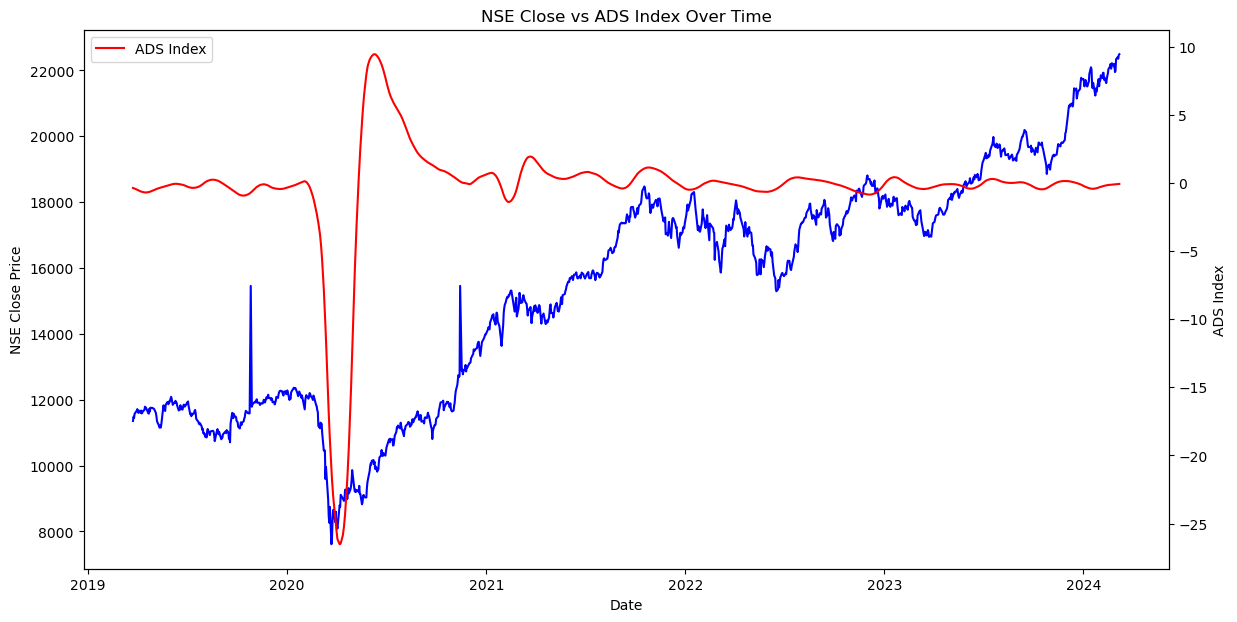

In [53]:
nse_data = nse_data[['Date', 'Close']]
ads_index = ads_index[['Date', 'ADS_Index']]

# Merge datasets on the 'Date' column
data_merged = pd.merge(nse_data, ads_index, on='Date', how='inner')
plt.figure(figsize=(14,7))
plt.plot(data_merged['Date'], data_merged['Close'], label='NSE Close', color='blue')
plt.xlabel('Date')
plt.ylabel('NSE Close Price')
plt.twinx()
plt.plot(data_merged['Date'], data_merged['ADS_Index'], label='ADS Index', color='red')
plt.ylabel('ADS Index')
plt.title('NSE Close vs ADS Index Over Time')
plt.legend(loc='upper left')
plt.show()

__Calculating Pearson Correlation coefficient
A correlation coefficient close to 1 or -1 indicates a strong relationship, whereas a coefficient around 0 suggests a weak relationship.__
<br>

__The Pearson Correlation Coefficient, denoted as 
r
r, is a statistical measure that evaluates the linear correlation or linear relationship between two variables. Its value ranges from -1 to 1, where:__

__1 indicates a perfect positive linear relationship,
-1 indicates a perfect negative linear relationship, and
0 indicates no linear relationship between the variables.__

In [54]:
# Calculate Pearson correlation coefficient
correlation_coef, p_value = pearsonr(data_merged['Close'], data_merged['ADS_Index'])
print(f'Pearson correlation coefficient: {correlation_coef:.2f}')



Pearson correlation coefficient: 0.14


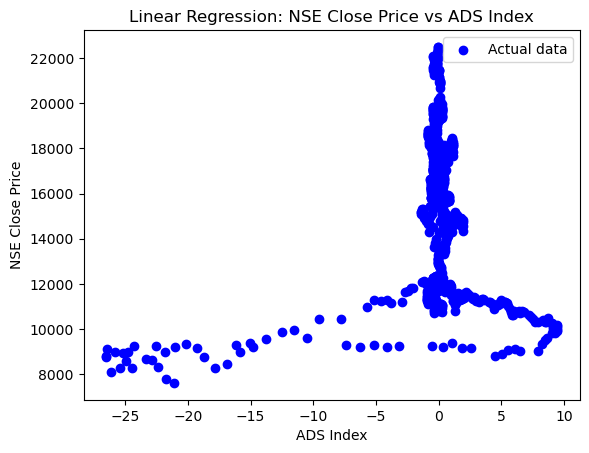

Model Coefficients: [122.59526631]
Model Intercept: 15428.763674729102


In [55]:
# Prepare the data for modeling
X = data_merged[['ADS_Index']]
y = data_merged['Close']

# Initialize and fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Make predictions
predictions = model.predict(X)

# Plot the results
plt.scatter(X, y, color='blue', label='Actual data')
# plt.plot(X, predictions, color='red', linewidth=2, label='Fitted line')
plt.xlabel('ADS Index')
plt.ylabel('NSE Close Price')
plt.title('Linear Regression: NSE Close Price vs ADS Index')
plt.legend()
plt.show()

print(f'Model Coefficients: {model.coef_}')
print(f'Model Intercept: {model.intercept_}')


__The model coefficient in the context of a linear regression represents the slope of the line that models the relationship between the independent variable (or variables) and the dependent variable. It quantifies the change in the dependent variable for a one-unit change in the independent variable, holding all other variables constant (in the case of multiple regression).__

__For example, in a linear regression model predicting the price of a house based on its size (in square feet), if the coefficient for size is 300, it means that for each additional square foot, the price of the house is expected to increase by__ __$300, assuming all other factors remain constant.__

__Coefficients are central to interpreting the results of a regression analysis, as they provide the magnitude and direction of the relationship between each independent variable and the dependent variable.__

In [56]:
nse_data.set_index('Date', inplace=True)
ads_index.set_index('Date', inplace=True)


<span style="font-size: 16pt;">__Granger Causality Test__</span><br>
Granger Causality Tests: Testing whether one time series can predict another, often used in economic and financial time series analysis.
<br>Predictive Causality: It tests whether the past values of one variable help to predict the future value of another variable.

Lag Length: The test involves specifying the number of lags of the influencing variable to be included. The choice of lag length can affect the test results and is typically determined based on various criteria (e.g., AIC, BIC).

Statistical Test: It uses regression models to test for Granger causality, typically involving F-tests to compare models with and without lagged terms of the supposed causal variable.
The Granger causality test has been widely used in econometrics, finance, neuroscience, and various fields where time series data are analyzed. 


In [57]:
# This step would normally be part of merging, but since we're not merging:
common_dates = nse_data.index.intersection(ads_index.index)
nse_close = nse_data.loc[common_dates, 'Close']  # Assuming 'Close' column exists
ads_index_series = ads_index.loc[common_dates, 'ADS_Index']  # Assuming 'ADS_Index' column exists

# Combine into a single DataFrame for the Granger causality test
combined_data = pd.concat([nse_close, ads_index_series], axis=1)


In [58]:
# This step would normally be part of merging, but since we're not merging:
common_dates = nse_data.index.intersection(ads_index.index)
nse_close = nse_data.loc[common_dates, 'Close']  # Assuming 'Close' column exists
ads_index_series = ads_index.loc[common_dates, 'ADS_Index']  # Assuming 'ADS_Index' column exists

# Combine into a single DataFrame for the Granger causality test
combined_data = pd.concat([nse_close, ads_index_series], axis=1)


In [59]:
# The maxlag parameter can be adjusted based on your data's frequency and size
granger_result = grangercausalitytests(combined_data, maxlag=4, verbose=True)



Granger Causality
number of lags (no zero) 1
ssr based F test:         F=0.7808  , p=0.3771  , df_denom=1222, df_num=1
ssr based chi2 test:   chi2=0.7827  , p=0.3763  , df=1
likelihood ratio test: chi2=0.7825  , p=0.3764  , df=1
parameter F test:         F=0.7808  , p=0.3771  , df_denom=1222, df_num=1

Granger Causality
number of lags (no zero) 2
ssr based F test:         F=2.0045  , p=0.1352  , df_denom=1219, df_num=2
ssr based chi2 test:   chi2=4.0255  , p=0.1336  , df=2
likelihood ratio test: chi2=4.0189  , p=0.1341  , df=2
parameter F test:         F=2.0045  , p=0.1352  , df_denom=1219, df_num=2

Granger Causality
number of lags (no zero) 3
ssr based F test:         F=2.9033  , p=0.0338  , df_denom=1216, df_num=3
ssr based chi2 test:   chi2=8.7601  , p=0.0327  , df=3
likelihood ratio test: chi2=8.7289  , p=0.0331  , df=3
parameter F test:         F=2.9033  , p=0.0338  , df_denom=1216, df_num=3

Granger Causality
number of lags (no zero) 4
ssr based F test:         F=2.3903  , p=0.

C:\Users\vipul patil\anaconda3\Lib\site-packages\statsmodels\tsa\stattools.py:1488: FutureWarning: verbose is deprecated since functions should not print results
  warnings.warn(


__Interest Rate vs Nifty returns over the years__

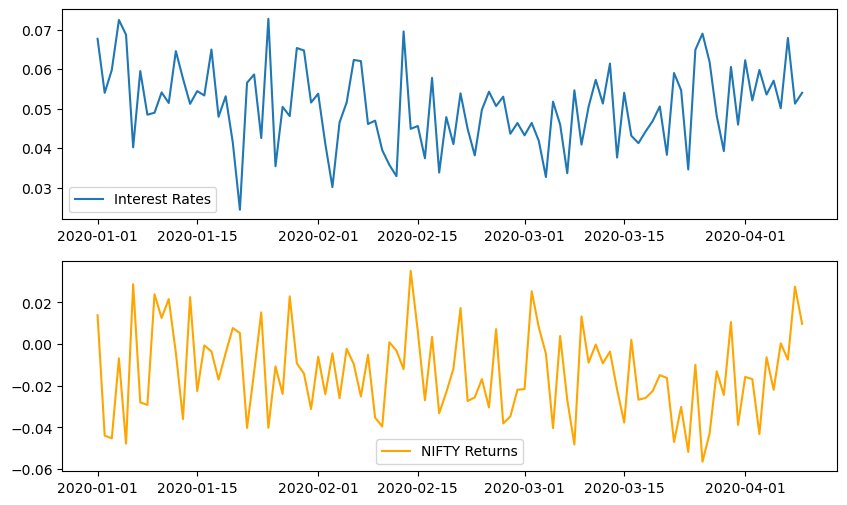

                            OLS Regression Results                            
Dep. Variable:           NiftyReturns   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     1.724
Date:                Sun, 24 Mar 2024   Prob (F-statistic):              0.192
Time:                        22:20:30   Log-Likelihood:                 246.53
No. Observations:                 100   AIC:                            -489.1
Df Residuals:                      98   BIC:                            -483.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         3.322e-05      0.011      0.003   

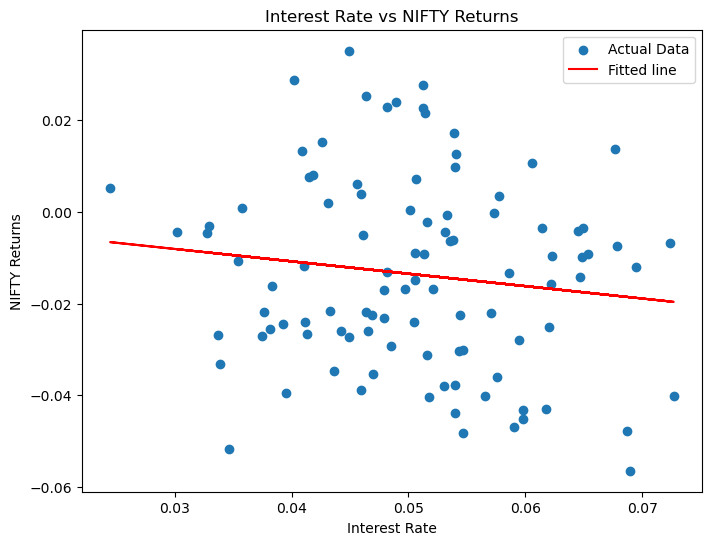

In [60]:
np.random.seed(0)
dates = pd.date_range('20200101', periods=100)
interest_rates = np.random.normal(0.05, 0.01, 100)  
nifty_returns = -0.5 * interest_rates + np.random.normal(0.01, 0.02, 100)  
df = pd.DataFrame({'Date': dates, 'InterestRate': interest_rates, 'NiftyReturns': nifty_returns})
df.set_index('Date', inplace=True)

# Visualizing the data
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(df.index, df['InterestRate'], label='Interest Rates')
plt.legend()
plt.subplot(2, 1, 2)
plt.plot(df.index, df['NiftyReturns'], label='NIFTY Returns', color='orange')
plt.legend()
plt.show()

# Preparing data for linear regression
X = sm.add_constant(df['InterestRate'])  # Adds a constant term to the predictor
y = df['NiftyReturns']

# Applying linear regression
model = sm.OLS(y, X).fit()
predictions = model.predict(X)

# Summary of the model
print(model.summary())

# Plotting the regression line
plt.figure(figsize=(8, 6))
plt.scatter(df['InterestRate'], df['NiftyReturns'], label='Actual Data')
plt.plot(df['InterestRate'], predictions, color='red', label='Fitted line')
plt.xlabel('Interest Rate')
plt.ylabel('NIFTY Returns')
plt.title('Interest Rate vs NIFTY Returns')
plt.legend()
plt.show()


<span style="font-size: 16pt;">__DAG__</span><br>
<img src="download (1).png" style="height:300px" />
What is a DAG?
A Directed Acyclic Graph (DAG) is a fundamental concept in computer science and statistics, particularly useful in the field of causal inference. Let's break down what a DAG is and why it's used, especially in statistical analysis:

Directed: It consists of nodes connected by edges, where each edge has a direction. This means that every edge points from one node (the cause) to another (the effect).

Acyclic: It doesn't contain any cycles. This means you can't start at one node and follow a sequence of edges that eventually loops back to the starting node. This property is crucial for representing causal relationships, as it avoids logical paradoxes that would arise from circular reasoning.

Graph: It's a set of vertices (nodes) connected by edges (lines or arrows).

Why is it Used?
Modeling Causal Relationships: In statistics and epidemiology, DAGs are used to represent and reason about causal relationships. They help in understanding how different variables influence each other.

Avoiding Confounding Bias: DAGs are particularly useful for identifying potential confounders in a study. Confounders are variables that influence both the cause and the effect, potentially leading to incorrect conclusions about the causal relationship. By visualizing the paths between variables, DAGs help in designing studies that can accurately determine causation.

Clarifying Assumptions: They make the assumptions in a causal model explicit. In any statistical analysis, assumptions about the relationships between variables are made, and DAGs help in illustrating these assumptions clearly.

Informing Statistical Analysis: They guide the selection of variables for inclusion in statistical models. By understanding the causal pathways, researchers can decide which variables to adjust for in their analyses.

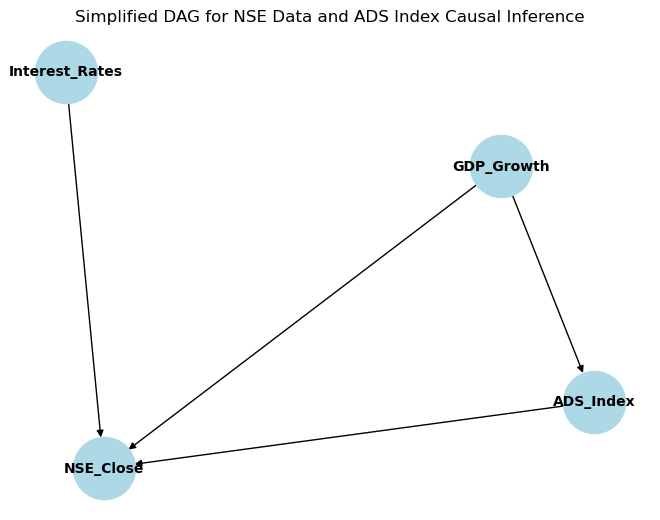

In [61]:
# Create a Directed Graph
dag = nx.DiGraph()

# Add nodes with the variable names
dag.add_nodes_from(["ADS_Index", "NSE_Close", "Interest_Rates", "GDP_Growth"])

# Add edges to represent assumed causal directions
dag.add_edge("ADS_Index", "NSE_Close")
dag.add_edge("Interest_Rates", "NSE_Close")
dag.add_edge("GDP_Growth", "NSE_Close")
dag.add_edge("GDP_Growth", "ADS_Index")  # Assuming GDP growth influences ADS Index

# Draw the DAG
pos = nx.spring_layout(dag)
nx.draw(dag, pos, with_labels=True, node_size=2000, node_color='lightblue', font_size=10, font_weight='bold')
plt.title('Simplified DAG for NSE Data and ADS Index Causal Inference')
plt.show()


__The Directed Acyclic Graph (DAG)__ created in the previous example is a simplified representation of potential causal relationships between the Aruoba-Diebold-Scotti (ADS) Index, the closing prices of the NSE (National Stock Exchange of India), and other economic factors like interest rates and GDP growth. Let's break down the components and the rationale behind the DAG:
<br>

__Nodes__<br>
Each node in the DAG represents a variable that could have an influence on the financial markets or is an outcome of such influences. In this example, we have four nodes:

ADS_Index: Represents the Aruoba-Diebold-Scotti business conditions index, which is an economic indicator that could signal the health of the economy.
NSE_Close: The closing price of the NSE, which is the outcome variable we are most directly interested in. The assumption here is that various factors, including economic indicators, could influence stock prices.<br>
Interest_Rates: Represents the prevailing interest rates, which can have a significant impact on financial markets. Higher interest rates can reduce the attractiveness of investing in stocks versus bonds, potentially lowering stock prices.<br>
GDP_Growth: The growth rate of the Gross Domestic Product, indicating the health and direction of the economy at large. Higher GDP growth often correlates with better business earnings and potentially higher stock prices.
<br>

__Edges__
The directed edges (arrows) indicate assumed causal relationships or influences between the variables. These relationships are based on economic theory, empirical research, or domain knowledge:

ADS_Index → NSE_Close: This arrow signifies the hypothesis that changes in the ADS Index (reflecting business conditions) can lead to movements in NSE stock prices. For instance, an improvement in business conditions might lead to higher stock prices.
Interest_Rates → NSE_Close: This indicates that interest rates might directly influence NSE stock prices. Typically, higher interest rates can lower stock prices due to increased borrowing costs for companies and higher yields on bonds attracting investment away from stocks.
GDP_Growth → NSE_Close: Suggests that economic growth, as measured by GDP growth, could influence stock prices. Generally, a growing economy could boost corporate earnings and thus stock prices.
GDP_Growth → ADS_Index: This edge represents the hypothesis that the overall economic growth impacts business conditions as captured by the ADS Index. Stronger economic growth might improve business conditions.

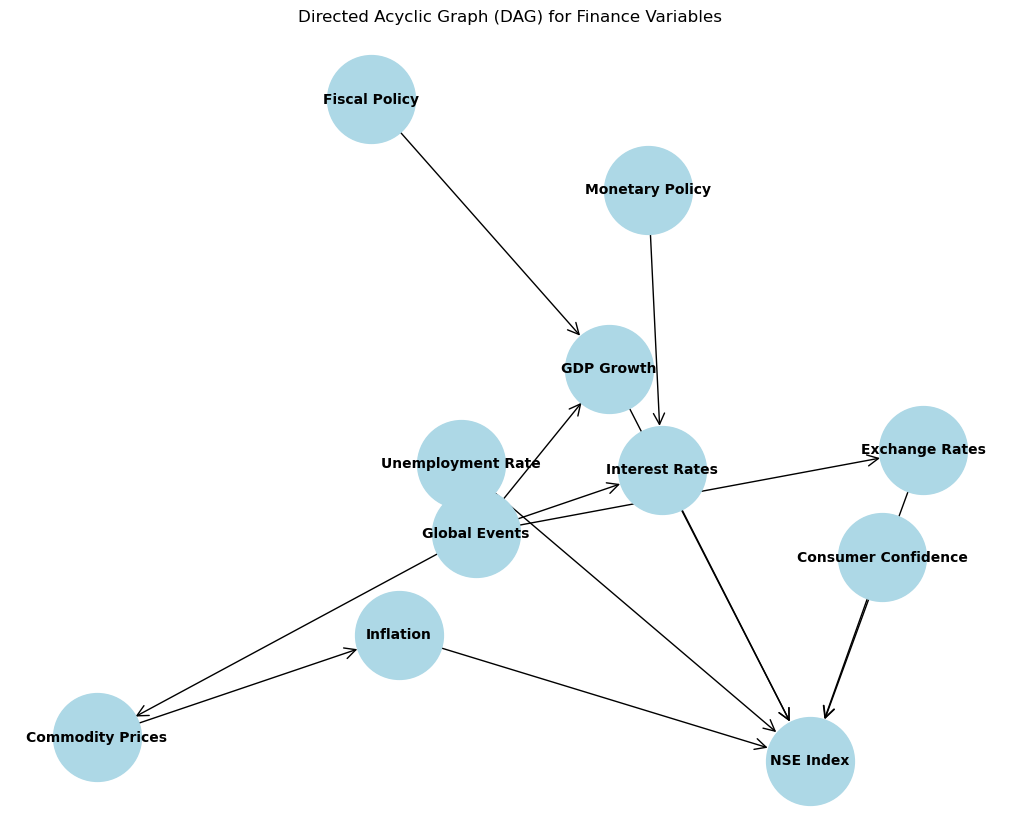

In [71]:
import networkx as nx
import matplotlib.pyplot as plt

# Create a directed graph
G = nx.DiGraph()

# Add nodes with their full forms as labels
nodes = {
    "IR": "Interest Rates",
    "INF": "Inflation",
    "ER": "Exchange Rates",
    "GDP": "GDP Growth",
    "UNEMP": "Unemployment Rate",
    "CC": "Consumer Confidence",
    "MP": "Monetary Policy",
    "FP": "Fiscal Policy",
    "CP": "Commodity Prices",
    "GE": "Global Events",
    "Nifty": "NSE Index"
}

# Add nodes to the graph
G.add_nodes_from(nodes)

# Add edges representing causal relationships
edges = [
    ("IR", "Nifty"),
    ("INF", "Nifty"),
    ("ER", "Nifty"),
    ("GDP", "Nifty"),
    ("UNEMP", "Nifty"),
    ("CC", "Nifty"),
    ("MP", "IR"),
    ("FP", "GDP"),
    ("CP", "INF"),
    ("GE", "IR"),
    ("GE", "ER"),
    ("GE", "GDP"),
    ("GE", "CP")
]

# Add edges to the graph
G.add_edges_from(edges)

# Draw the graph
plt.figure(figsize=(10, 8))
pos = nx.spring_layout(G)  # positions for all nodes
nx.draw(G, pos, with_labels=True, labels=nodes, node_size=4000, node_color="lightblue", font_size=10, font_weight="bold", arrowstyle="->", arrowsize=20)
plt.title("Directed Acyclic Graph (DAG) for Finance Variables")
plt.show()


Interest Rates (IR): Interest rates are assumed to have a direct effect on the Nifty. Generally, higher interest rates can reduce investment and consumer spending, leading to a decrease in stock prices. Conversely, lower interest rates tend to encourage borrowing and investment, potentially boosting stock market performance.<br>

Inflation (INF): Inflation impacts the Nifty through its effect on consumers' purchasing power and corporate earnings. High inflation might lead to lower consumer spending and higher costs for companies, which can negatively affect stock prices.<br>

Exchange Rates (ER): The value of the national currency in comparison to others can affect companies' earnings, especially those involved in import and export activities, thereby impacting the Nifty.<br>

GDP Growth (GDP): The overall growth of the economy, measured by GDP, is a significant indicator of corporate earnings potential. Higher GDP growth usually supports better performance of stock markets.<br>

Unemployment Rate (UNEMP): The unemployment rate is an indicator of economic health where higher unemployment may reflect economic struggles, potentially leading to lower stock market performance as consumer spending and overall economic activity diminish.<br>

Consumer Confidence (CC): Consumer confidence reflects how optimistic or pessimistic consumers are regarding their financial prospects. Higher confidence can lead to increased spending and investment, positively affecting stock markets.<br>

Monetary Policy (MP) and Fiscal Policy (FP): These policies, enacted by the central bank and government respectively, have broader impacts on the economy, including influencing interest rates (IR), GDP growth, and inflation (INF), thereby indirectly affecting the Nifty.<br>

Commodity Prices (CP): Changes in the prices of commodities can have various effects on inflation (INF) and the costs for companies that depend on these commodities, thus indirectly impacting the Nifty.<br>

Global Events (GE): International incidents, such as geopolitical tensions, global pandemics, or international trade agreements, can affect multiple factors including interest rates, exchange rates, GDP growth, and commodity prices, which in turn may impact the Nifty.<br>

In [66]:
df = pd.read_csv('https://github.com/Patilvipu/Dataset/blob/main/NSE.csv')
print(df.columns)

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj_Close', 'Volume'], dtype='object')


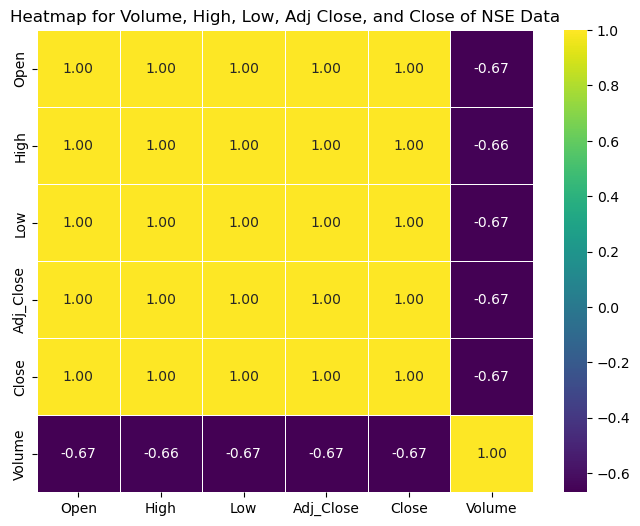

In [68]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Select the specific columns for the heatmap
columns_of_interest = ['Open', 'High', 'Low', 'Adj_Close', 'Close', 'Volume']
data_subset = df[columns_of_interest]

# Calculate the correlation matrix for the selected columns
corr_subset = data_subset.corr()

# Generate a heatmap for the selected subset of data
plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
sns.heatmap(corr_subset, annot=True, cmap='viridis', fmt=".2f", linewidths=.5)
plt.title('Heatmap for Volume, High, Low, Adj Close, and Close of NSE Data')
plt.show()


<span style="font-size: 16pt;">__Conclusion__</span><br>
The application of causal inference in finance holds profound implications for both theoretical research and practical applications. On a theoretical level, it enriches our understanding of financial markets' dynamics, offering insights into how various factors influence market behavior and economic outcomes. This knowledge is indispensable for developing more robust financial theories and models that can better capture the complexities of the real world.
<br>

Practically, causal inference empowers financial analysts, portfolio managers, policy makers, and regulators with the tools to make evidence-based decisions. By identifying the causal impact of one variable on another, stakeholders can devise strategies that are more likely to yield the desired outcomes. For instance, understanding the causal effect of central bank policies on inflation rates or the impact of technological innovations on stock market performance can guide more effective policy formulation and investment strategies.
<br>

Moreover, in an era dominated by big data and machine learning, the role of causal inference in finance is becoming increasingly significant. Traditional data analysis methods often fall short in distinguishing causation from correlation, leading to potentially flawed conclusions and decisions. Integrating causal inference techniques with machine learning can enhance model accuracy and predictive power, paving the way for more sophisticated and reliable financial analysis tools.




<span style="font-size: 16pt;">__References__</span><br>
__ScienceDirect__<br>
__Medium__<br>
__Kaggle__<br>
__Yahoo Finance__